# 📌 Klasifikasi Risiko Stroke dengan SVM dan ANN
Pada tugas ini, kita akan menggunakan **Stroke Prediction Dataset**. Dataset bisa diakses melalui link berikut:\
🔗 https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Tujuan utama dari tugas ini adalah membangun model SVM (Support Vector Machine) atau ANN (Artificial Neural Network) untuk memprediksi risiko stroke seseorang berdasarkan fitur kesehatan dan demografis.

Langkah-langkah yang harus dilakukan antara lain:

1. Persiapan Dataset & Eksplorasi Awal
- Memuat dataset, melihat struktur data, tipe fitur (numerik atau kategorikal), dan distribusi label.

2. Preprocessing 
- Memproses data agar siap untuk digunakan dalam model, termasuk menangani missing value, encoding fitur kategorikal, dan normalisasi/standardisasi jika diperlukan.

3. Eksperimen Model 
Untuk SVM:
- Bangun model Support Vector Machine Classifier.
- Eksperimen dengan kernel (linear, rbf, poly), parameter regularisasi C, dan parameter kernel lain seperti gamma.

Untuk ANN:
- Bangun Artificial Neural Network menggunakan satu atau beberapa hidden layer.
- Eksperimen dengan jumlah neuron, jumlah layer, fungsi aktivasi (relu, sigmoid, tanh), optimizer, dan jumlah epoch.

4. Evaluasi Model
- Hitung metrik evaluasi seperti Accuracy, Precision, Recall, F1-Score, serta visualisasikan Confusion Matrix.
- Untuk ANN, visualisasikan learning curve (loss dan accuracy terhadap epoch).

5. Analisis & Kesimpulan
- Bandingkan performa antar eksperimen parameter, kernel (SVM) atau arsitektur (ANN).
- Tentukan kombinasi parameter terbaik yang menghasilkan performa optimal.
- Identifikasi fitur yang paling berpengaruh dalam memprediksi risiko stroke.
- Menarik kesimpulan mengenai kemampuan SVM/ANN dalam menangani dataset ini, termasuk kelebihan dan keterbatasannya.

# 1. Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

# 2. Load Dataset

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# 3. Eksplorasi Data

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

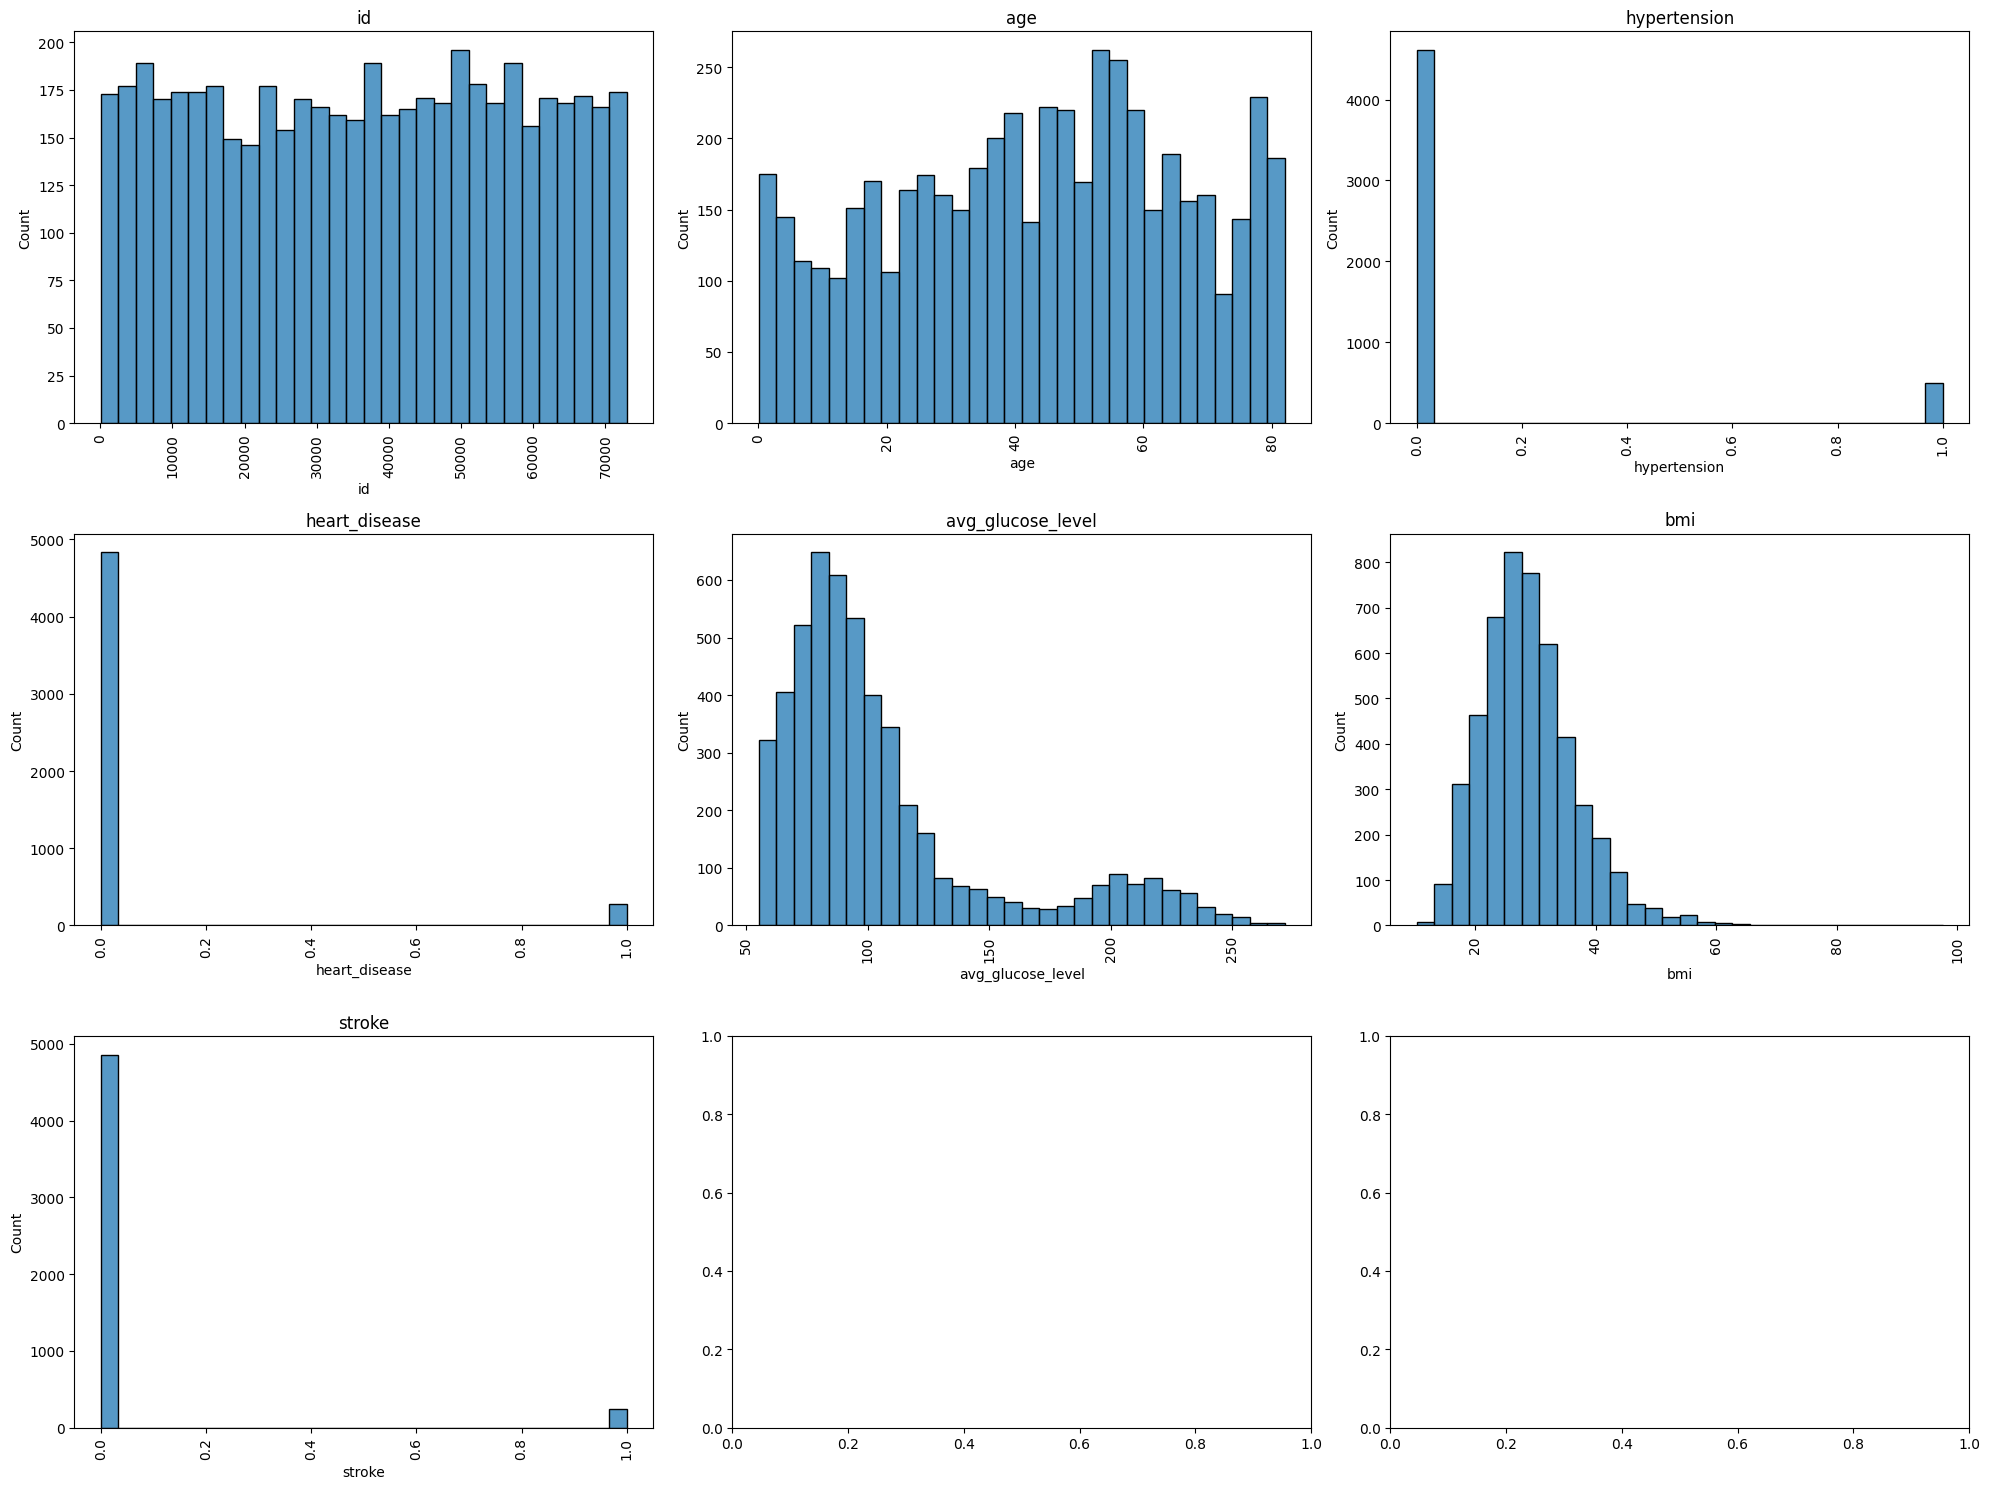

In [7]:
kolom_numerik = df.select_dtypes(np.number).columns
fig, axes = plt.subplots(3, 3, figsize=(20,15))
axes = axes.flatten()

for i, col in enumerate(kolom_numerik):
    sns.histplot(df[col], ax=axes[i], bins=30)
    axes[i].tick_params(axis='x', rotation=90)  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

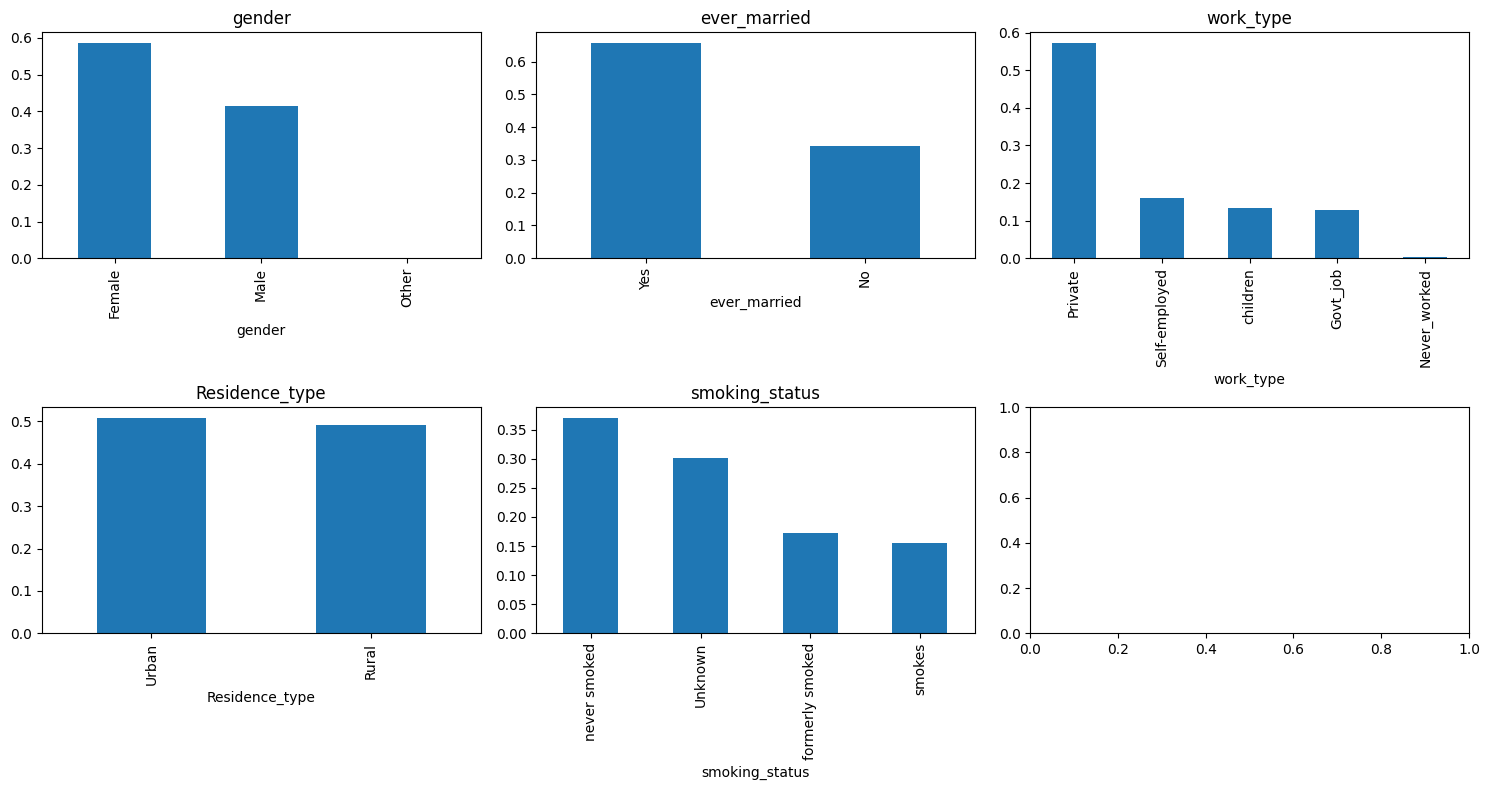

In [8]:
kolom_kategorikal = df.select_dtypes(np.object_).columns
fig, axes = plt.subplots(2, 3, figsize=(15,8))
axes = axes.flatten()

for i, col in enumerate(kolom_kategorikal):
    df[col].value_counts(normalize=True).plot(kind='bar', ax=axes[i])
    axes[i].tick_params(axis='x')  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

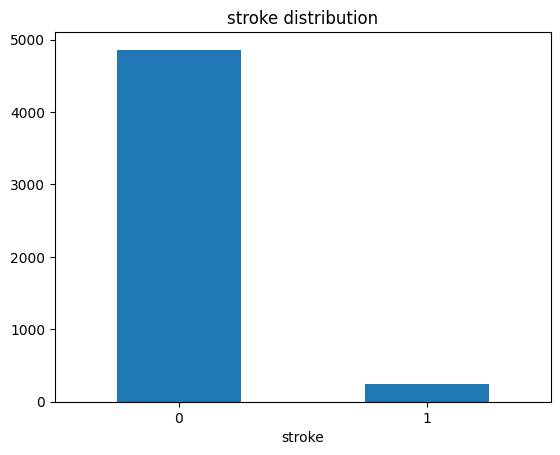

In [9]:
df['stroke'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('stroke distribution')
plt.show()

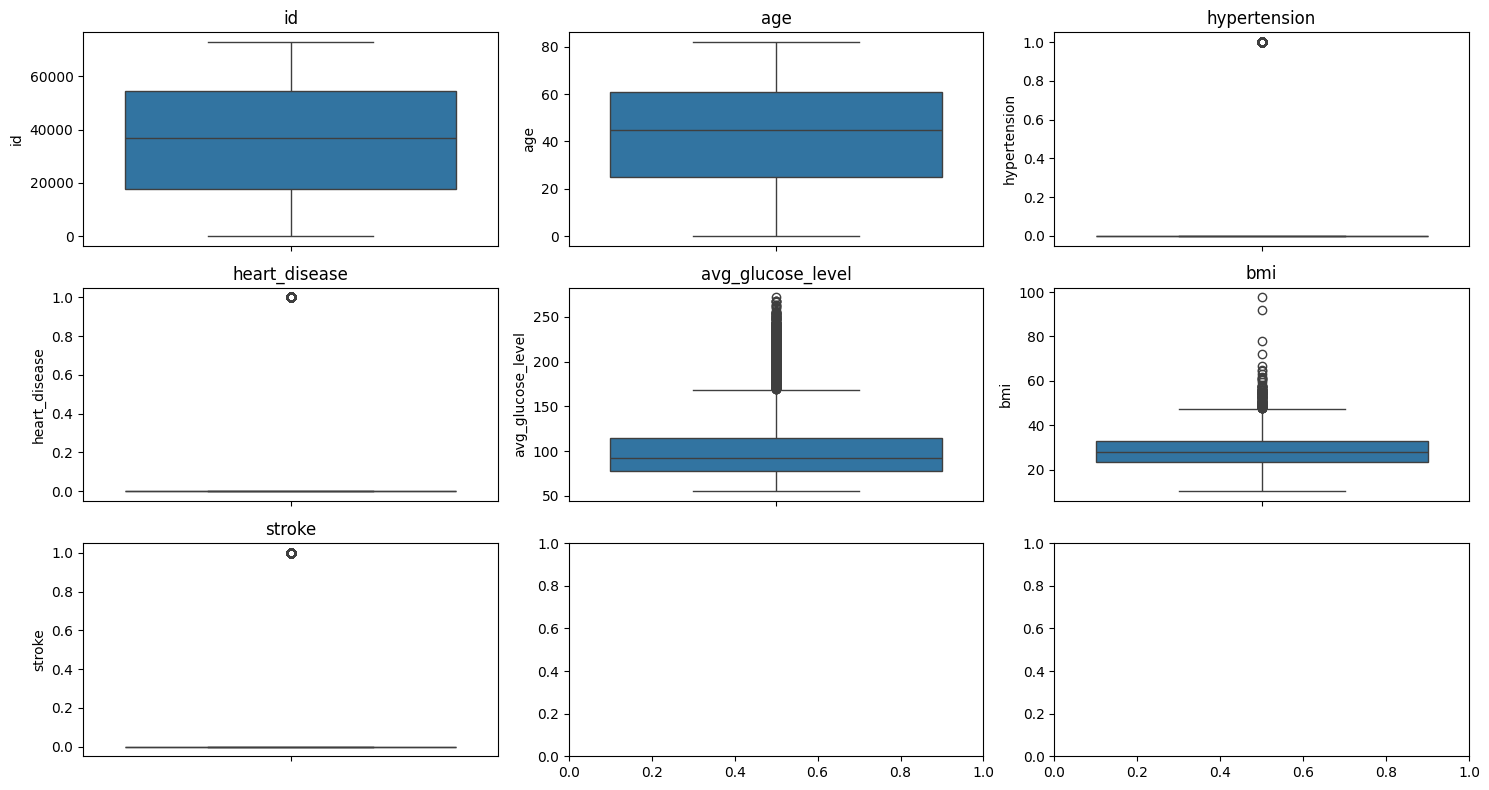

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(15,8))
axes = axes.flatten()

for i, col in enumerate(kolom_numerik):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].tick_params(axis='x')  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

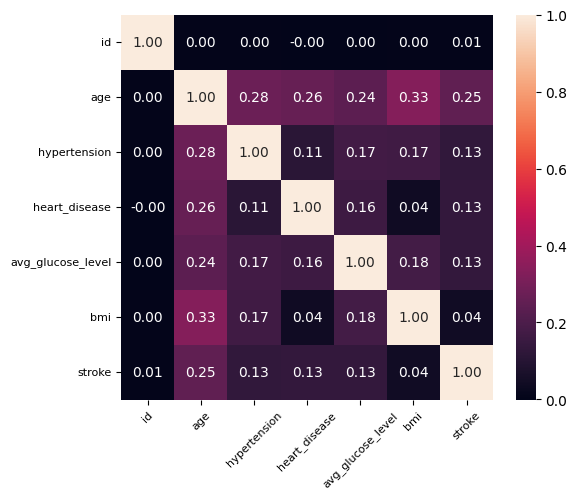

In [11]:
plt.figure(figsize=(6,5))
korelasi = df[kolom_numerik].corr(method='pearson')
sns.heatmap(korelasi, annot=True, fmt='.2f')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# 4. Data Cleaning & Preprocessing

In [12]:
df.drop(columns=['id'], inplace=True)

In [13]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# 5. Feature Engineering & Selection

In [14]:
x = pd.get_dummies(df.drop('stroke', axis=1), drop_first=True)
y = df['stroke']

smote = SMOTE(random_state=42, k_neighbors=3)
x_res, y_res = smote.fit_resample(x, y)
df_after_smote = pd.concat([x_res, y_res], axis=1)

x = df_after_smote.drop('stroke', axis=1)
y = df_after_smote['stroke']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# 6. Training

#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernels = ['linear', 'rbf']
C_values = [0.1, 1]
gammas = ['scale', 0.1]

for kernel in kernels:
    for C in C_values:
        for gamma in gammas:
            model = SVC(kernel=kernel, C=C, gamma=gamma)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            print(f"Kernel={kernel}, C={C}, gamma={gamma}, Akurasi={acc:.4f}")


Kernel=linear, C=0.1, gamma=scale, Akurasi=0.8735
Kernel=linear, C=0.1, gamma=0.1, Akurasi=0.8735
Kernel=linear, C=1, gamma=scale, Akurasi=0.8792
Kernel=linear, C=1, gamma=0.1, Akurasi=0.8792
Kernel=rbf, C=0.1, gamma=scale, Akurasi=0.7584
Kernel=rbf, C=0.1, gamma=0.1, Akurasi=0.8941
Kernel=rbf, C=1, gamma=scale, Akurasi=0.7717
Kernel=rbf, C=1, gamma=0.1, Akurasi=0.9692


#### ANN

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

layers = [(10,5), (10,), (5,)]
activations = ['relu', 'tanh']
solvers = ['sgd', 'adam']

for hl in layers:
    for act in activations:
        for solv in solvers:
            model = MLPClassifier(hidden_layer_sizes=hl, activation=act, solver=solv,
                                  max_iter=500, random_state=42)
            model.fit(X_train, y_train)
            y_pred_ann = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred_ann)
            print(f"Layer={hl}, Aktivasi={act}, Solver={solv}, Akurasi={acc:.4f}")


Layer=(10, 5), Aktivasi=relu, Solver=sgd, Akurasi=0.7789
Layer=(10, 5), Aktivasi=relu, Solver=adam, Akurasi=0.8766
Layer=(10, 5), Aktivasi=tanh, Solver=sgd, Akurasi=0.7491
Layer=(10, 5), Aktivasi=tanh, Solver=adam, Akurasi=0.8859
Layer=(10,), Aktivasi=relu, Solver=sgd, Akurasi=0.7501
Layer=(10,), Aktivasi=relu, Solver=adam, Akurasi=0.8792
Layer=(10,), Aktivasi=tanh, Solver=sgd, Akurasi=0.7429
Layer=(10,), Aktivasi=tanh, Solver=adam, Akurasi=0.8828
Layer=(5,), Aktivasi=relu, Solver=sgd, Akurasi=0.7897
Layer=(5,), Aktivasi=relu, Solver=adam, Akurasi=0.8740
Layer=(5,), Aktivasi=tanh, Solver=sgd, Akurasi=0.7445
Layer=(5,), Aktivasi=tanh, Solver=adam, Akurasi=0.8802


# 7. Evaluation

#### SVM

In [17]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.9691516709511568

Confusion Matrix:
 [[935  38]
 [ 22 950]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       973
           1       0.96      0.98      0.97       972

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



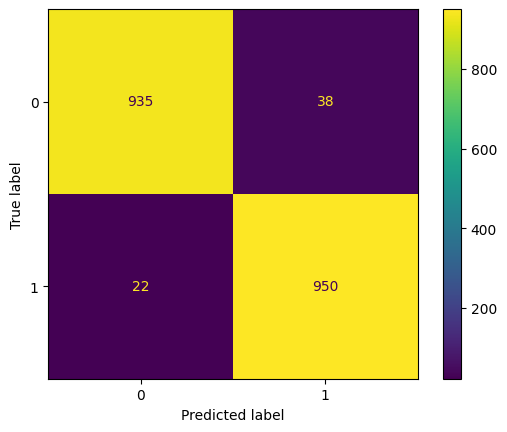

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

#### ANN

In [19]:
print("Akurasi:", accuracy_score(y_test, y_pred_ann))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ann))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ann))

Akurasi: 0.8802056555269923

Confusion Matrix:
 [[840 133]
 [100 872]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       973
           1       0.87      0.90      0.88       972

    accuracy                           0.88      1945
   macro avg       0.88      0.88      0.88      1945
weighted avg       0.88      0.88      0.88      1945



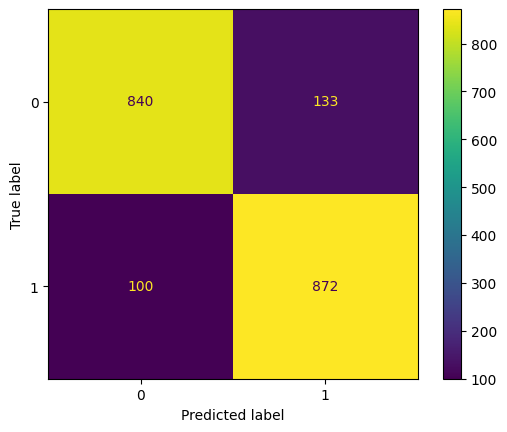

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ann)
plt.show()

# 8. Kesimpulan

Jadi dapat kita simpulkan dari percobaan 2 model di atas untuk mengklasifikasi stroke lebih baik menggunakan SVM dengan kernel rbf, C=1, Gamma=0.1 dengan akurasi 0.97